In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [126]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_fscore_support
)
from sklearn.preprocessing import StandardScaler, label_binarize

In [127]:
df = pd.read_csv("./IMDB_Dataset.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [128]:
# Basic information about the dataset
df.info()

# Summary of numerical columns
df.describe()

# Check data types of each column
df.dtypes

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   650 non-null    object 
 1   Released_Year  650 non-null    int64  
 2   Certificate    580 non-null    object 
 3   Runtime        650 non-null    object 
 4   Genre          650 non-null    object 
 5   IMDB_Rating    650 non-null    float64
 6   Overview       650 non-null    object 
 7   Meta_score     516 non-null    float64
 8   Director       650 non-null    object 
 9   Star           650 non-null    object 
 10  No_of_Votes    650 non-null    int64  
 11  Gross          534 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 61.1+ KB
Dataset contains 650 rows and 12 columns.


In [129]:
df['Gross'] = df['Gross'].str.replace(',', '')
print(df['Gross'].head(1))

df['Gross'] = df['Gross'].astype('float64')
df['Gross'] = df['Gross'].replace(np.nan, 0)

0    28341469
Name: Gross, dtype: object


               Missing Values  Percentage
Series_Title                0    0.000000
Released_Year               0    0.000000
Certificate                70   10.769231
Runtime                     0    0.000000
Genre                       0    0.000000
IMDB_Rating                 0    0.000000
Overview                    0    0.000000
Meta_score                134   20.615385
Director                    0    0.000000
Star                        0    0.000000
No_of_Votes                 0    0.000000
Gross                       0    0.000000


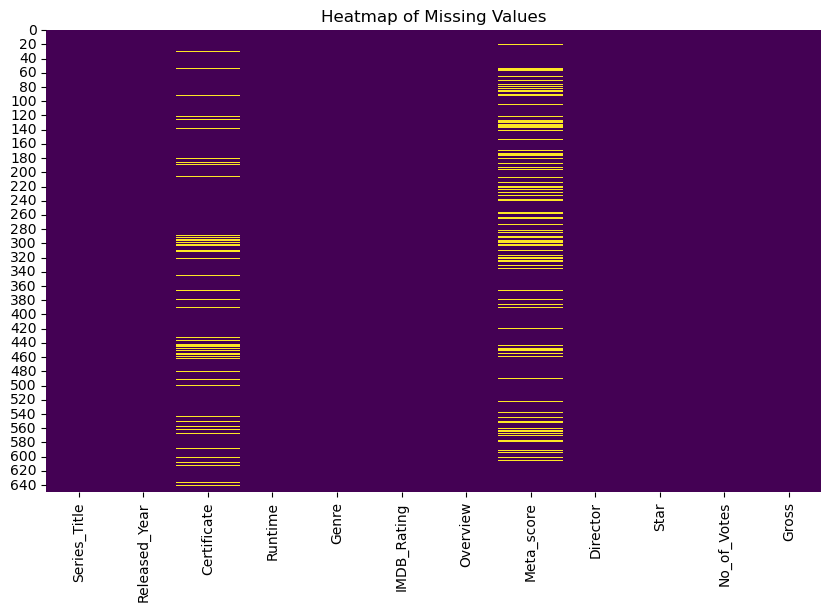

In [130]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [131]:
# Check for infinite values in numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    inf_count = df[col].isin([np.inf, -np.inf]).sum()
    if inf_count > 0:
        print(f"Column '{col}' contains {inf_count} infinite values.")

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [132]:
# Fill missing values for numerical columns with the mean (example)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [133]:
#Replace missing values in categorical columns.
df['Certificate'] = df['Certificate'].fillna('Unknown')

               Missing Values  Percentage
Series_Title                0         0.0
Released_Year               0         0.0
Certificate                 0         0.0
Runtime                     0         0.0
Genre                       0         0.0
IMDB_Rating                 0         0.0
Overview                    0         0.0
Meta_score                  0         0.0
Director                    0         0.0
Star                        0         0.0
No_of_Votes                 0         0.0
Gross                       0         0.0


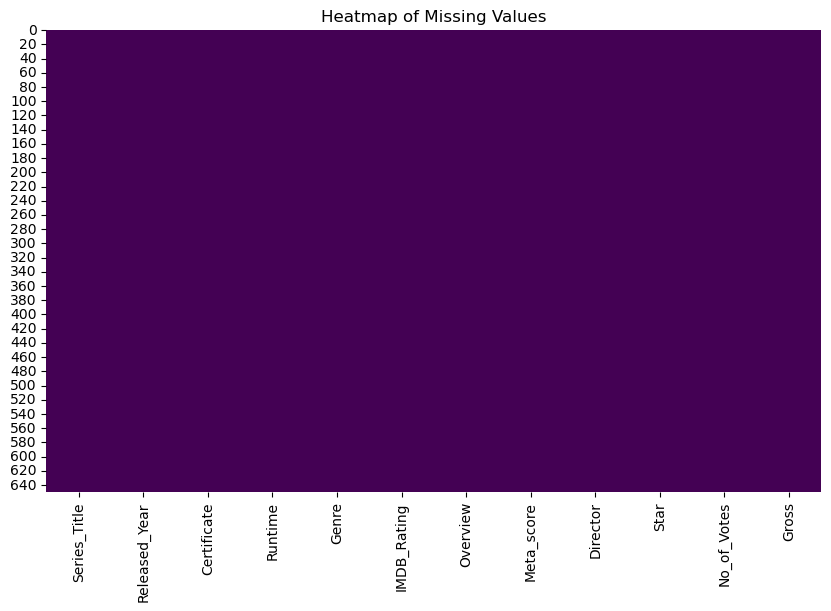

In [134]:
# Check for missing values
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine and display
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [135]:
# Check and count duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [136]:
df.drop(columns=['Series_Title'], inplace=True)
df.drop(columns=['Overview'], inplace=True)
df.head()


,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star,No_of_Votes,Gross
0,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,2343110,28341469.0
1,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,1620367,134966411.0
2,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,2303232,534858444.0
3,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0
4,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,689845,4360000.0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  650 non-null    int64  
 1   Certificate    650 non-null    object 
 2   Runtime        650 non-null    object 
 3   Genre          650 non-null    object 
 4   IMDB_Rating    650 non-null    float64
 5   Meta_score     650 non-null    float64
 6   Director       650 non-null    object 
 7   Star           650 non-null    object 
 8   No_of_Votes    650 non-null    int64  
 9   Gross          650 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 50.9+ KB


In [138]:
# Converting 'Runtime' column (e.g., '142 min') to numeric
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Label Encoding for all non-numeric columns
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is non-numeric
        df[col] = label_encoder.fit_transform(df[col])

# Display the transformed dataframe
print("Updated Numeric DataFrame:")
print(df.head())

# Verify the data types
print("\nData Types after Encoding:")
print(df.dtypes)

Updated Numeric DataFrame:
   Released_Year  Certificate  Runtime  Genre  IMDB_Rating  Meta_score  \
0           1994            1      142    117          9.3        80.0   
1           1972            1      175    103          9.2       100.0   
2           2008           13      152     17          9.0        84.0   
3           1974            1      202    103          9.0        90.0   
4           1957           12       96    103          9.0        96.0   

   Director  Star  No_of_Votes        Gross  
0        97   412      2343110   28341469.0  
1        95   291      1620367  134966411.0  
2        54    90      2303232  534858444.0  
3        95     7      1129952   57300000.0  
4       318   183       689845    4360000.0  

Data Types after Encoding:
Released_Year      int64
Certificate        int32
Runtime            int32
Genre              int32
IMDB_Rating      float64
Meta_score       float64
Director           int32
Star               int32
No_of_Votes        int64

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


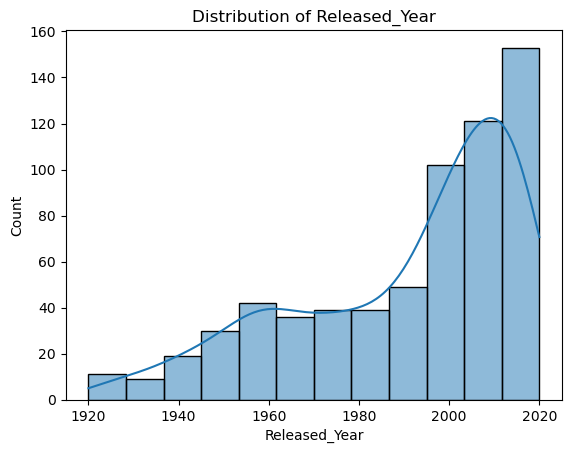

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


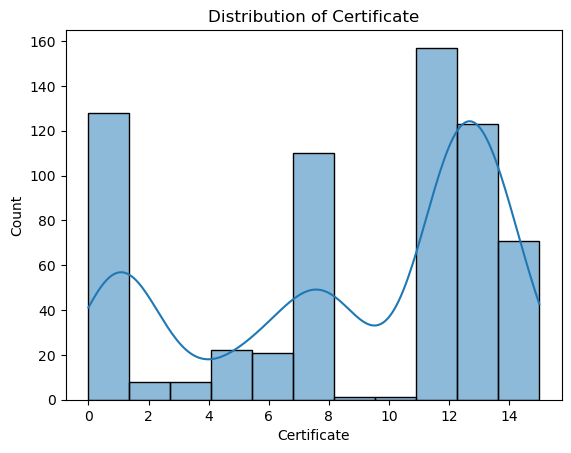

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


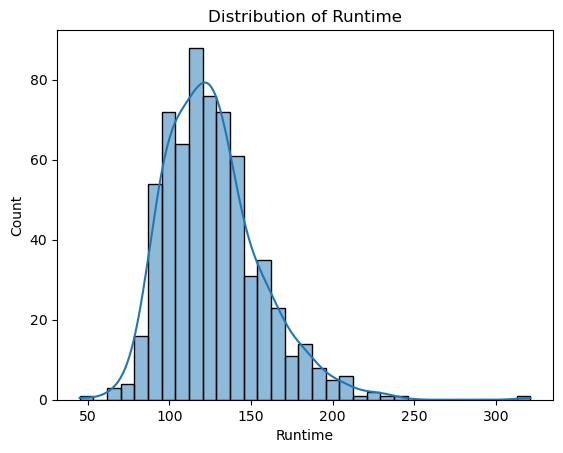

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


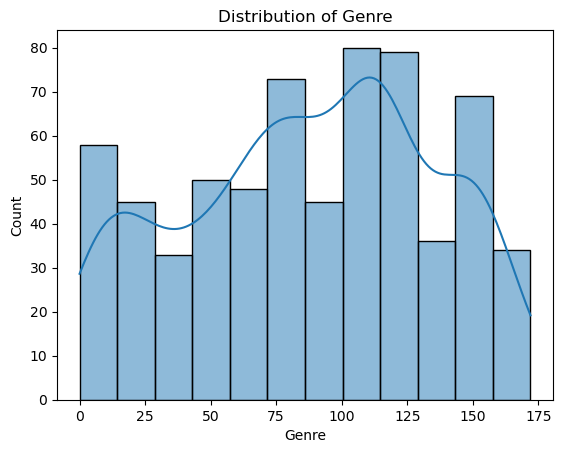

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


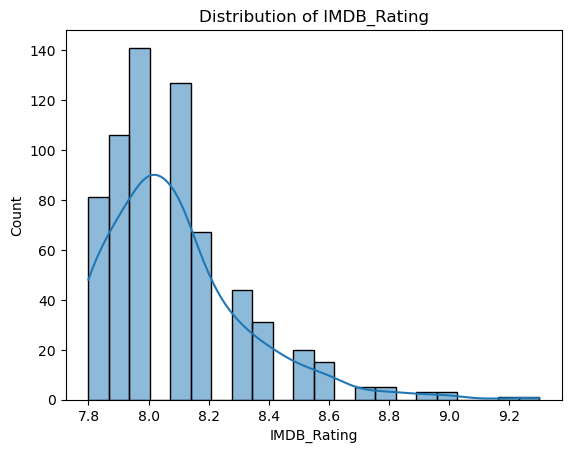

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


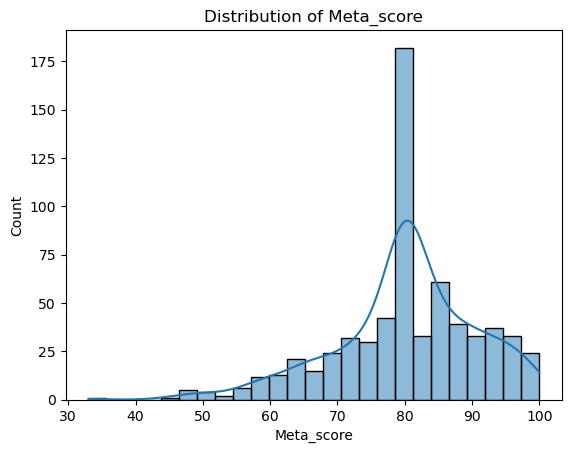

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


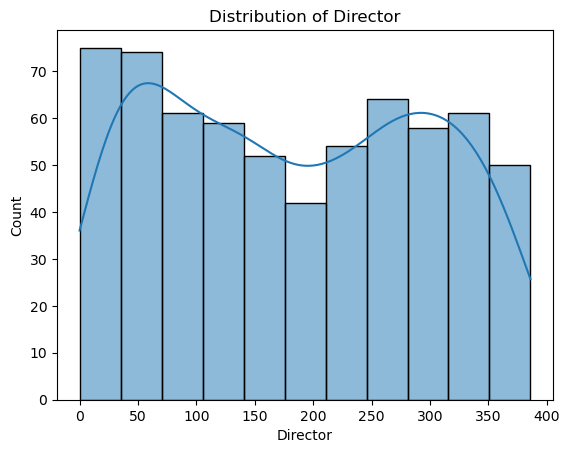

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


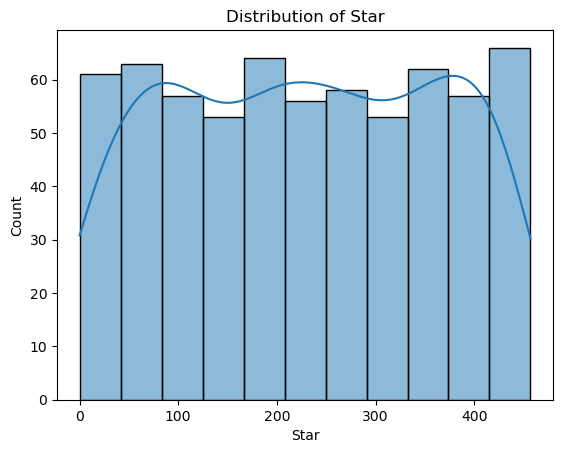

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


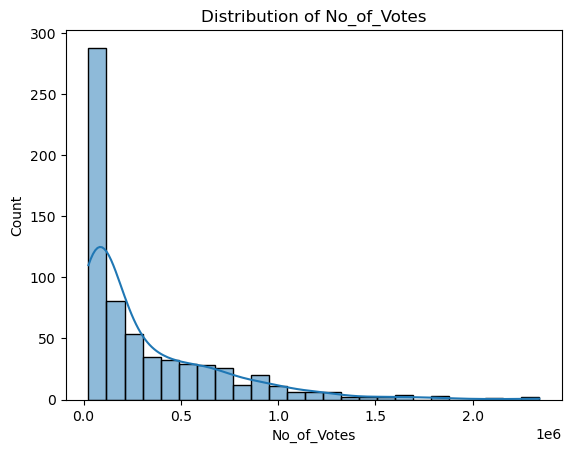

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


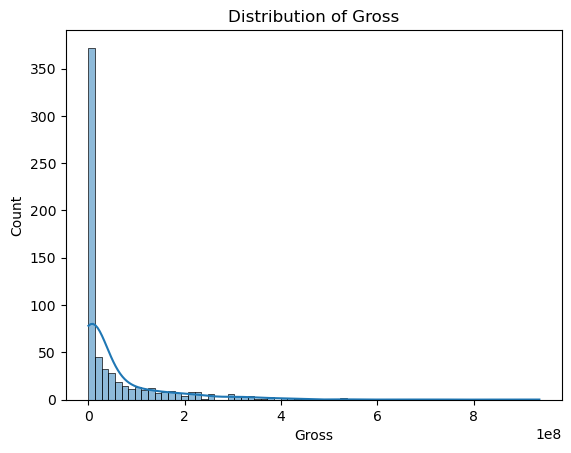

In [139]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [140]:
for column in df.select_dtypes(include=[object]).columns:
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.show()

In [141]:
# Check unique class counts for each column
print("Class distribution for Certificate:")
print(df['Certificate'].value_counts())

print("\nClass distribution for Genre:")
print(df['Genre'].value_counts())

print("\nClass distribution for IMDB_Rating (binned):")
df['Rating_Category'] = pd.cut(df['IMDB_Rating'], bins=[0, 7.9, 8.2, 10], labels=['Low', 'Medium', 'High'])
print(df['Rating_Category'].value_counts())

Class distribution for Certificate:
Certificate
12    155
1     127
13    123
8      84
14     70
7      26
5      22
6      21
2       8
3       7
11      2
9       1
0       1
10      1
15      1
4       1
Name: count, dtype: int64

Class distribution for Genre:
Genre
117    57
149    25
103    21
73     20
85     20
       ..
60      1
83      1
82      1
41      1
42      1
Name: count, Length: 173, dtype: int64

Class distribution for IMDB_Rating (binned):
Rating_Category
Medium    335
Low       187
High      128
Name: count, dtype: int64


C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


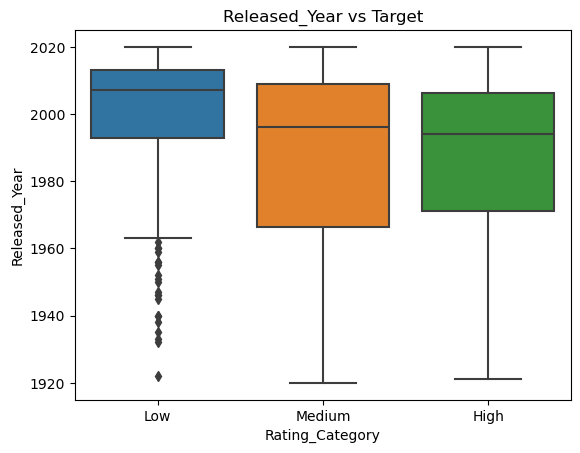

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


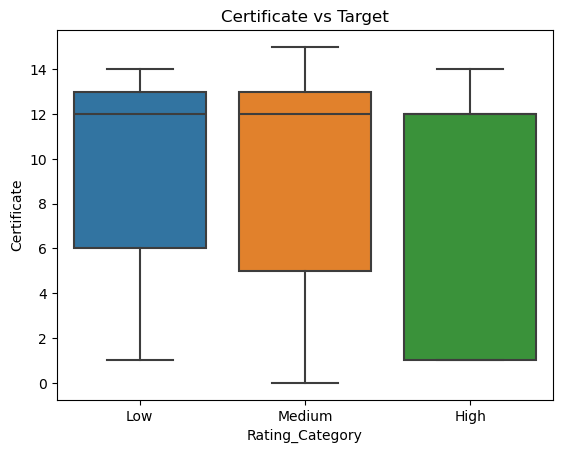

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


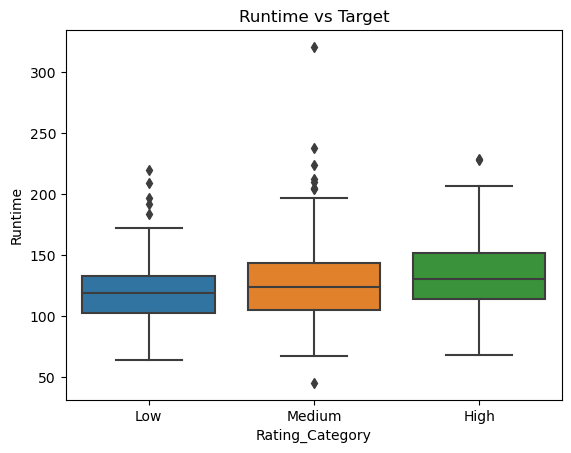

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


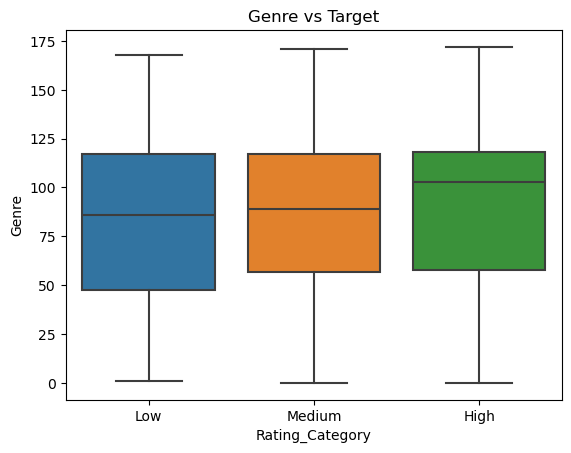

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


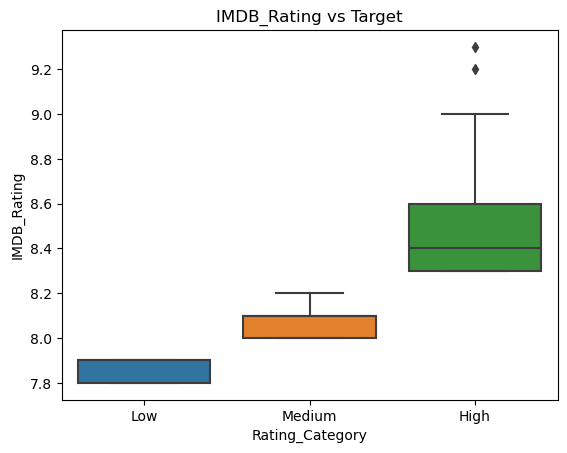

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


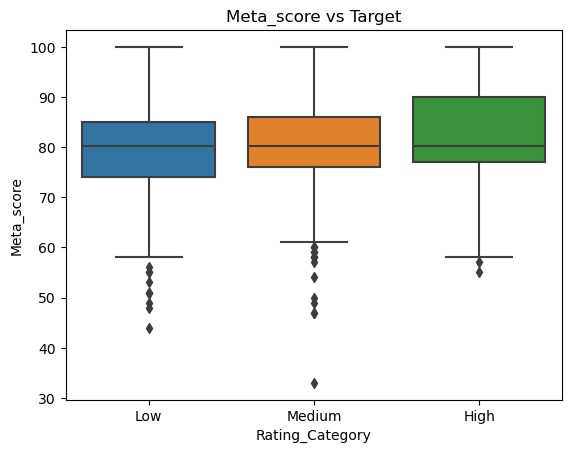

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


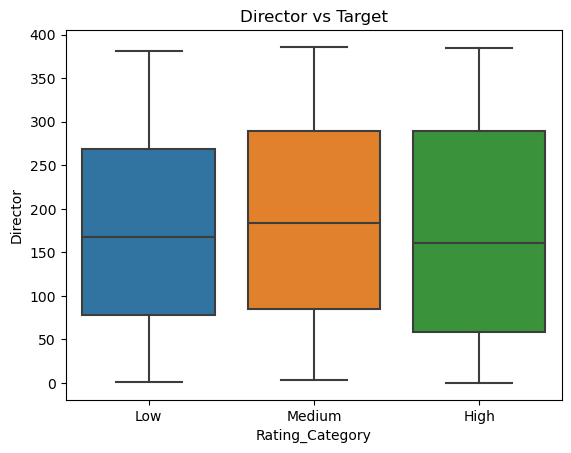

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


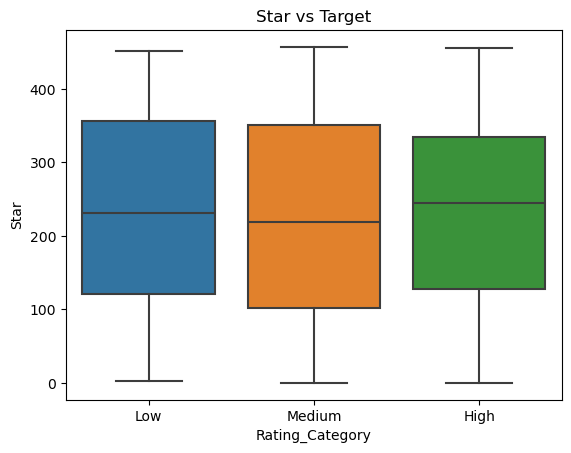

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


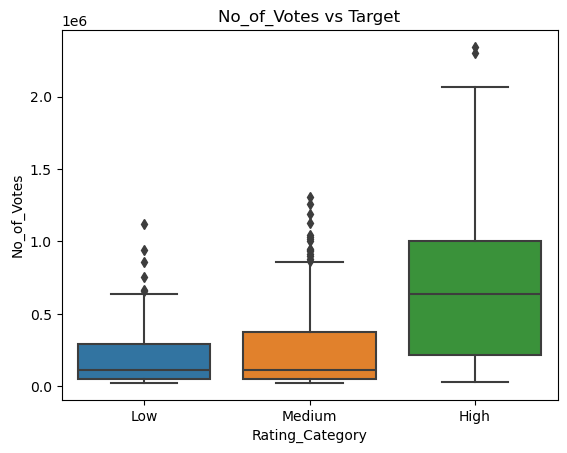

C:\Users\yashm\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


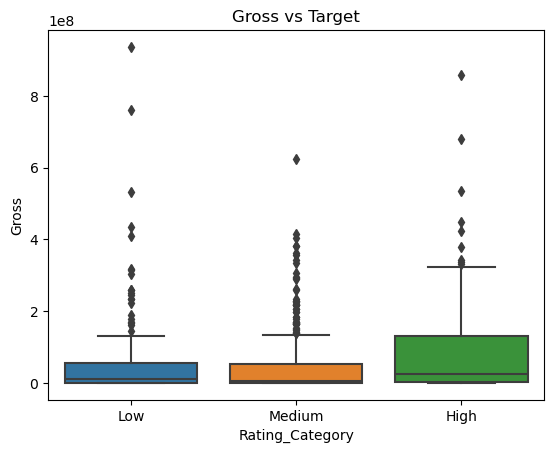

In [142]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x='Rating_Category', y=column, data=df)
    plt.title(f'{column} vs Target')
    plt.show()

In [143]:
def enhanced_decision_tree(X, y):
    # Encode target labels if needed
    if y.dtype == 'object' or y.dtype == 'category':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    y_binarized = label_binarize(y, classes=np.unique(y))
    n_classes = y_binarized.shape[1]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    y_test_binarized = label_binarize(y_test, classes=np.unique(y))
    results = {}

    # Models to evaluate
    models = {
        "Gini": DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, random_state=42),
        "Entropy": DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=10, random_state=42),
    }


    for model_name, model in models.items():
        print(f"\n--- Decision Tree using {model_name} Criterion ---")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[f"Decision Tree ({model_name})"] = acc

        # Performance Metrics
        print(f"Accuracy: {acc}")
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F-Score: {fscore:.2f}")

        importance = model.feature_importances_
        for name, imp in zip(X.columns, importance):
            print(f"{name}: {imp}")


        # ROC Curve
        plt.figure(figsize=(8, 6))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
        plt.title(f"ROC Curve for Decision Tree ({model_name})")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.show()

        # Visualize the Tree
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True, fontsize=10)
        plt.title(f"Decision Tree Visualization ({model_name})")
        plt.show()

    # --- Comparative Analysis ---
    print("\n--- Cross-Validation for Decision Tree (Gini Criterion) ---")
    gini_model = DecisionTreeClassifier(criterion="gini", random_state=42)
    gini_scores = cross_val_score(gini_model, X, y, cv=5)
    print("Cross-Validation Scores (Gini):", gini_scores)
    print("Mean Cross-Validation Accuracy (Gini):", gini_scores.mean())
    results["Decision Tree (Gini, Cross-Validation)"] = gini_scores.mean()

    print("\n--- Cross-Validation for Decision Tree (Entropy Criterion) ---")
    entropy_model = DecisionTreeClassifier(criterion="entropy", random_state=42)
    entropy_scores = cross_val_score(entropy_model, X, y, cv=5)
    print("Cross-Validation Scores (Entropy):", entropy_scores)
    print("Mean Cross-Validation Accuracy (Entropy):", entropy_scores.mean())
    results["Decision Tree (Entropy, Cross-Validation)"] = entropy_scores.mean()

    # --- Comparative Bar Plot ---
    plt.figure(figsize=(10, 6))
    plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen', 'coral'])
    plt.title("Decision Tree: Accuracy Comparison")
    plt.xticks(rotation=45)
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.show()


--- Decision Tree using Gini Criterion ---
Accuracy: 0.6307692307692307
Confusion Matrix:
 [[13  1 12]
 [ 1 20 16]
 [ 6 12 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.50      0.57        26
           1       0.61      0.54      0.57        37
           2       0.64      0.73      0.68        67

    accuracy                           0.63       130
   macro avg       0.63      0.59      0.61       130
weighted avg       0.63      0.63      0.63       130

Precision: 0.63, Recall: 0.63, F-Score: 0.63
Released_Year: 0.27686846765828393
Certificate: 0.0
Runtime: 0.09782651582457053
Genre: 0.0
Meta_score: 0.015325658615287702
Director: 0.10761479455846702
Star: 0.022919762527325478
No_of_Votes: 0.39453380958933626
Gross: 0.0849109912267291


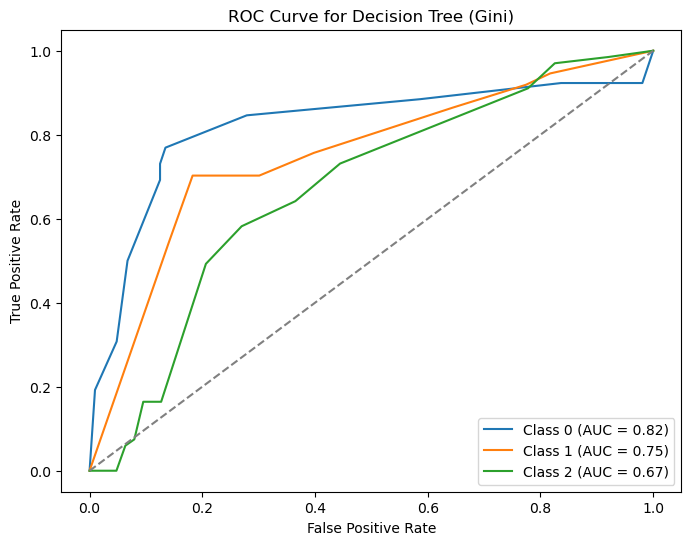

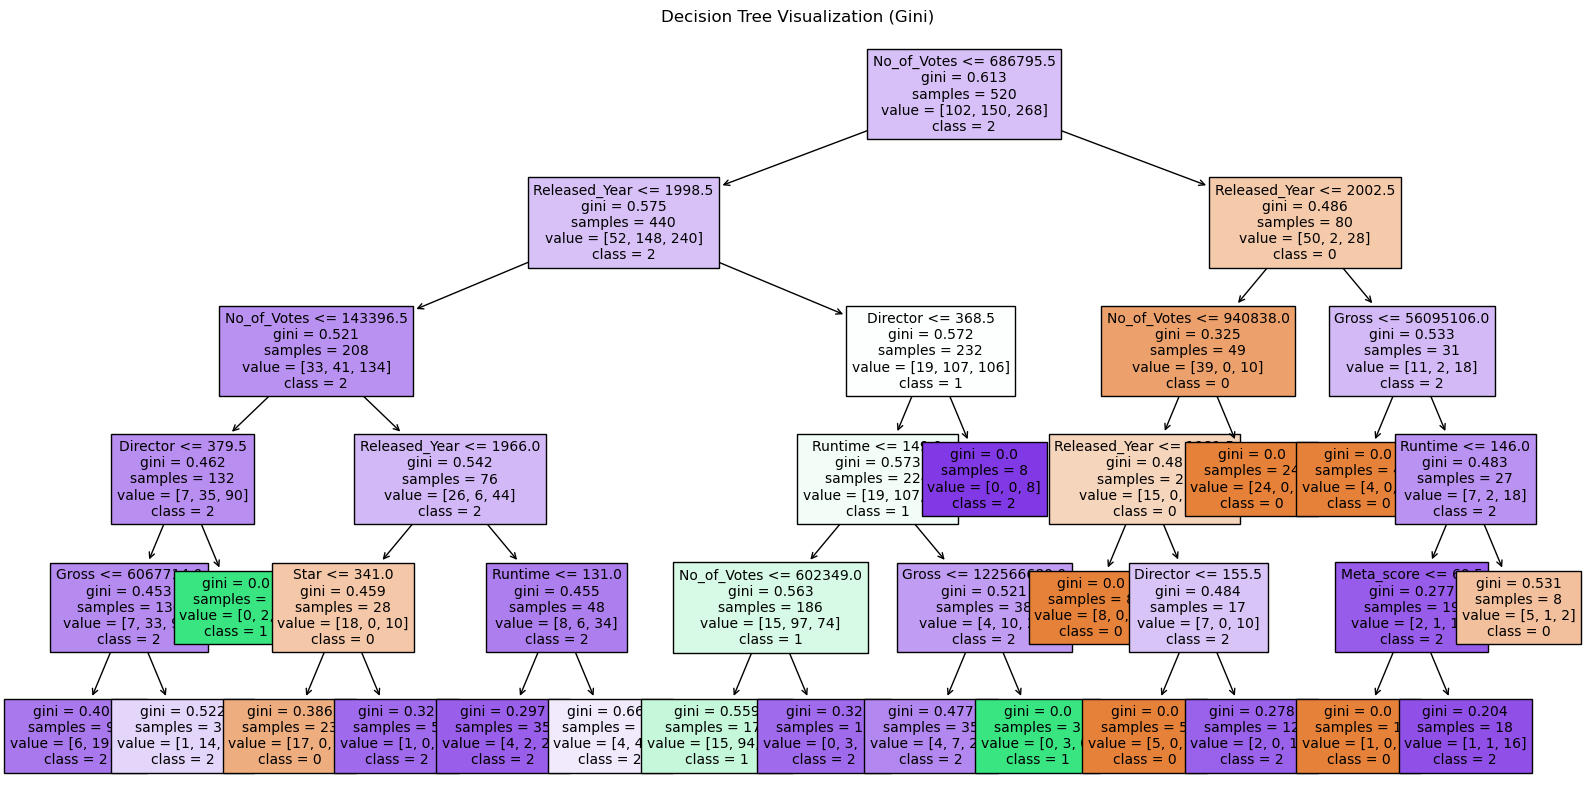


--- Decision Tree using Entropy Criterion ---
Accuracy: 0.5615384615384615
Confusion Matrix:
 [[15  2  9]
 [ 2 15 20]
 [ 8 16 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        26
           1       0.45      0.41      0.43        37
           2       0.60      0.64      0.62        67

    accuracy                           0.56       130
   macro avg       0.55      0.54      0.55       130
weighted avg       0.56      0.56      0.56       130

Precision: 0.56, Recall: 0.56, F-Score: 0.56
Released_Year: 0.28997970686105556
Certificate: 0.0
Runtime: 0.020270428176153404
Genre: 0.0191864823012691
Meta_score: 0.0
Director: 0.06804849480469086
Star: 0.13406011385695557
No_of_Votes: 0.4012925811675973
Gross: 0.06716219283227819


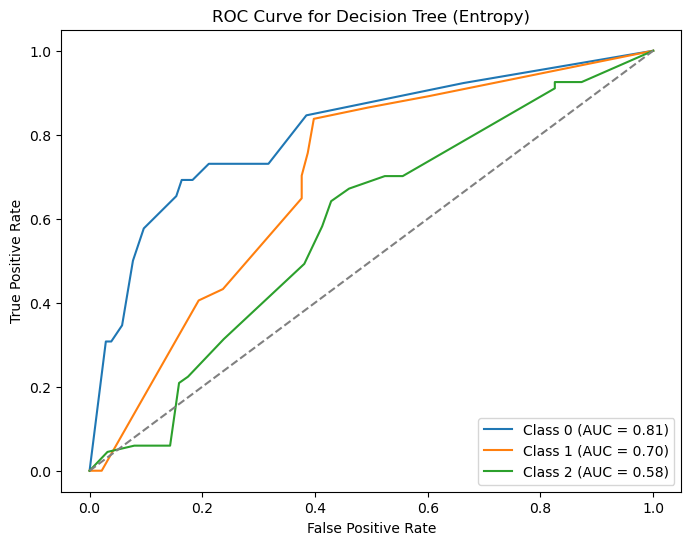

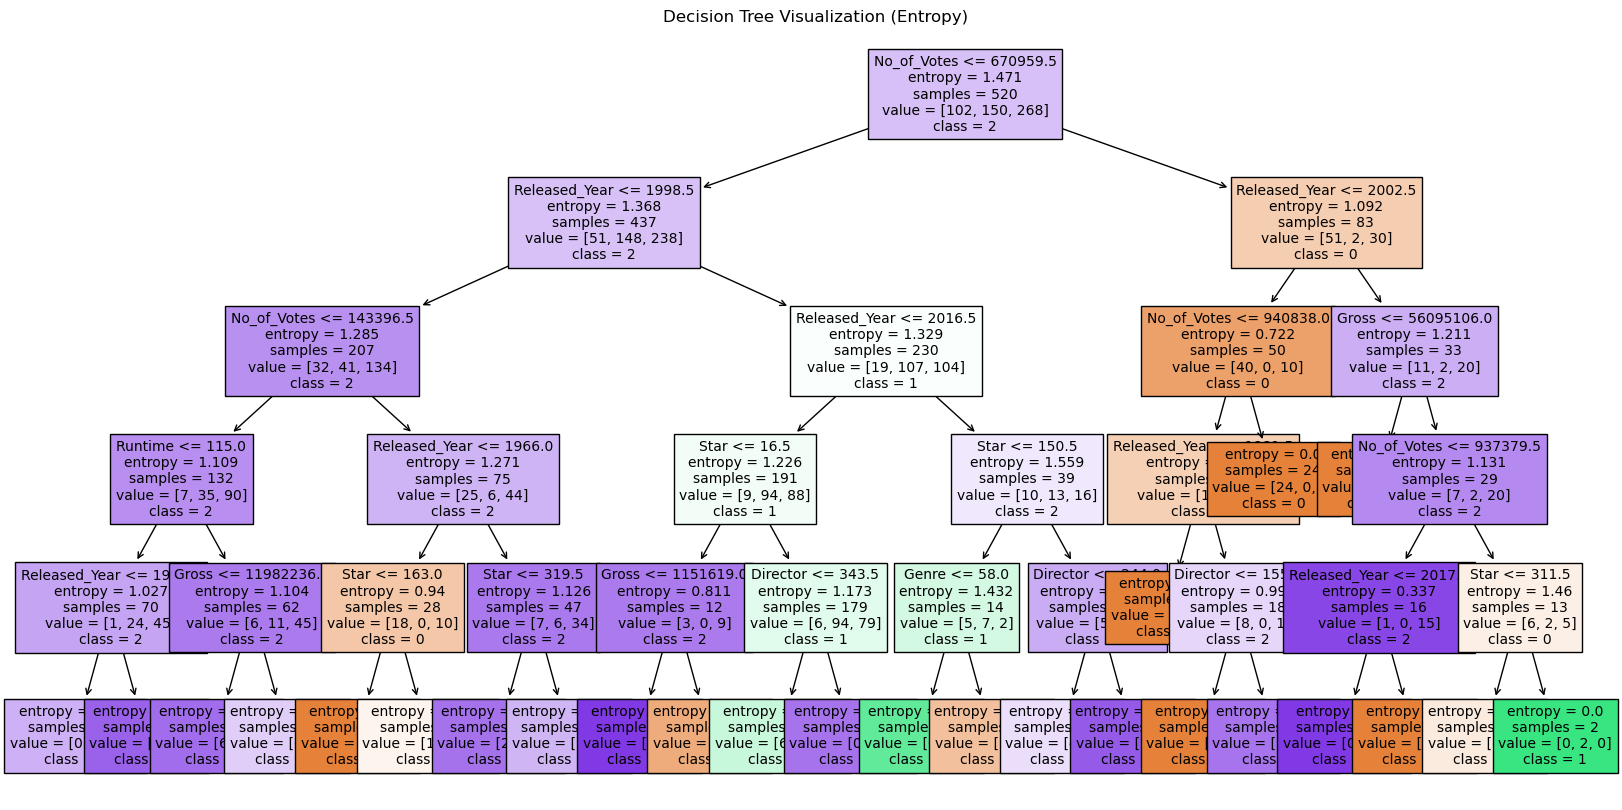


--- Cross-Validation for Decision Tree (Gini Criterion) ---
Cross-Validation Scores (Gini): [0.54615385 0.47692308 0.5        0.38461538 0.52307692]
Mean Cross-Validation Accuracy (Gini): 0.4861538461538461

--- Cross-Validation for Decision Tree (Entropy Criterion) ---
Cross-Validation Scores (Entropy): [0.53846154 0.43846154 0.47692308 0.45384615 0.54615385]
Mean Cross-Validation Accuracy (Entropy): 0.49076923076923074


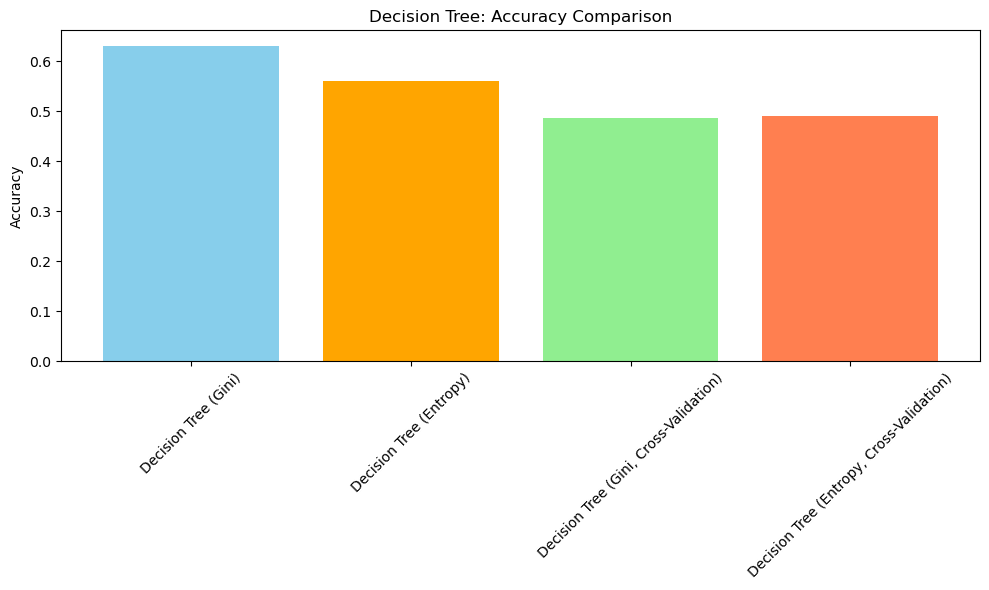

In [145]:
X = df.drop(columns=['Rating_Category','IMDB_Rating'])  # Features
y = df['Rating_Category']  # Target
enhanced_decision_tree(X, y)

1. Accuracy Analysis

    Gini Criterion Accuracy: 0.63 (63%)
    Entropy Criterion Accuracy: 0.56 (56%)

This suggests that the model's performance is moderate, with the Gini criterion performing slightly better than the Entropy criterion. However, both accuracies are below 70%, which indicates that there is room for improvement in the model's ability to generalize. Given that the accuracy is not very high, further tuning and analysis of the data and model parameters are required.

2. Precision, Recall, F1-Score
   
- Gini Criterion:Precision, recall, and F1-score are reasonably balanced across the classes, but not very high, indicating that the model is not excelling at distinguishing between the classes.The macro average of precision and recall is 0.63, meaning the model is making reasonable but imperfect predictions across all classes.The weighted average precision, recall, and F1-score are 0.63, suggesting that the model performs slightly better on class 2, which has more samples.

- Entropy Criterion:The precision, recall, and F1-score are generally lower than the Gini model, with the macro averages being around 0.56. This indicates that the model using entropy as the criterion is performing worse in terms of correctly predicting classes.Class 1 has noticeably poor precision and recall, which is likely contributing to the lower overall performance of the Entropy-based model.

3. Feature Importance Analysis
   
- Key Features: The most important features for the Gini model are No_of_Votes (0.39), Released_Year (0.28), and Director (0.11).
- Less Important Features: Certificate, Genre, Star, and Meta_score seem to have very low importance in the model.
- Both models are heavily reliant on certain features such as No_of_Votes and Released_Year.
- This suggests that these features are strong predictors for the Rating_Category and might be overemphasized.
-Features like Certificate and Genre are contributing very little to the decision-making process, which may indicate that they are not as relevant in predicting the target variable.